In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
X, y = load_iris(return_X_y=True)
X, y = X[:100, [0, 2]], y[:100]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

# How does the algorithm works?

Logistic regression is classification algorithm. In basic version it's a binary classification.

First of all, we are predicting full net input, using standard formula.

![](img/f1.bmp)

Algorithm is called regression, because we are predicting PROBABILITY that sample belongs to certain class. 
Probability is predicted using sigmoid function.

![](img/f2.bmp)

![](img/sigmoid.png)

# Update rules

Algorithm adjust weights using following rule.

   ![](img/f5.bmp)

# Cost function

In algorithm, we want to minimize cost function (crossed-entropy).

![](img/f3.bmp)

Derivatives of cost function with respect to wj and b.

![](img/f4.bmp)

# Algorithm

Algorithm steps:
1. Initialize random, non-zero weights
2. For each iteration:
- predict probablility 
- calculate gradients
- adjust weight

# Implementation

In [3]:
class LogisticRegression:
    """
    Logistic Regression Classifier
    
    Attributes
    ----------------
    eta : float
        learning rate
    n_iters : int
        number of epochs to train model
    w : one-dimensional array
        vector of weights [n_features, ]
    b : float
        bias of the model
        
    Methods
    -----------------
    fit(X, y)
        fits classifier to data
    predict(X)
        predict classes for samples in matrix X
    predict_proba(X)
        predict probability that sample belongs to class 1
    __net_input(X)
        calculate full net input
    __activation(X)
        sigmoid activation function
    __cost_function(y, pred_proba)
        binary cross-entropy cost function
    """ 
    
    def __init__(self, eta=0.01, n_iters=10):
        self.eta = eta
        self.n_iters = n_iters
        self.w = None
        self.b = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        # initialize weights
        self.w = np.random.sample(n_features)
        self.b = np.random.sample()
        cost_ = []
        for i in range(self.n_iters):
            # predict probabilities for classes
            y_pred = self.predict_proba(X)
            # calculate cost function
            cost = self.__cost_function(y, y_pred)
            cost_.append(cost)
            # calculate error [for probabilities]
            error = (y_pred - y)
            # update weights
            self.w -= self.eta * np.dot(X.T, error) / n_samples
            self.b -= self.eta * error.mean()
        return cost_
    
    def predict(self, X):
        # predict classes
        probas = self.predict_proba(X)
        return np.where(probas >= 0.5, 1, 0)
    
    def predict_proba(self, X):
        # predict probabilities
        z = self.__net_input(X)
        return self.__activation(z)
    
    def __net_input(self, X):
        # full net input
        return np.dot(X, self.w) + self.b
    
    def __activation(self, z):
        # sigmoid activation function
        return 1 / (1 + np.exp(-z))
    
    def __cost_function(self, y, pred_proba):
        # cost function
        return (- y * np.log(pred_proba) - (1 - y) * np.log(1 - pred_proba)).mean()

# Training Classifier

In [4]:
epochs = 100
lr = LogisticRegression(eta=0.1, n_iters=epochs)
cost = lr.fit(X_train, y_train)

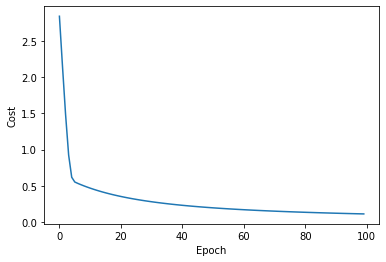

In [5]:
plt.plot(np.arange(0, epochs), cost)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()

# Validate Classifier

In [6]:
y_pred = lr.predict(X_test)
print(f'Accuracy on test set: {accuracy_score(y_test, y_pred)}')

Accuracy on test set: 1.0


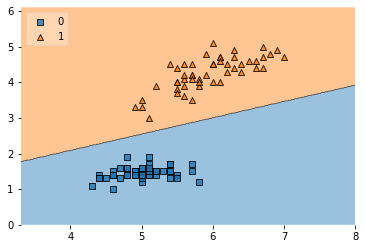

In [7]:
plot_decision_regions(X, y, clf=lr, legend=2)
plt.show()